In [60]:
import numpy as np
import joblib

%matplotlib notebook
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel

import sys
sys.path.append("../")
sys.path.append("../../RARinterpret")
import lgpc
import RARinterpret

%load_ext autoreload
%autoreload 2


_X, y, weights, features, indxs = (joblib.load('../../RARinterpret/results/processed_cat.p')[p]
                           for p in ("X", "y", "weights", "features", "indxs"))
x = _X[:, 4]
z = _X[:, 0]

from scipy.stats import spearmanr

from scipy.stats import truncnorm, norm

from sklearn.linear_model import LinearRegression

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [61]:
features

['gbar', 'e_gbar', 'SBdisk', 'SBbul', 'MHI', 'dist', 'inc', 'e_inc', 'L36']

In [63]:
n_splits = 25

# test_masks = RARinterpret.test_groupshuffle_mask(indxs, n_splits=n_splits, test_size=0.2, random_state=42)
test_masks = RARinterpret.test_shuffle_mask(z.size, n_splits, test_size=0.2)

# gpr = GaussianProcessRegressor(kernel=RBF() + WhiteKernel(), n_restarts_optimizer=1, normalize_y=True)

gpr = LinearRegression()



dxz, dyz, fullout = lgpc.get_reg_residuals(gpr, x, y, z, test_masks, partial=True)
dxz_summ = lgpc.fold_average(dxz)
dyz_summ = lgpc.fold_average(dyz)

100%|█████████████████████████████████████████| 25/25 [00:00<00:00, 1567.03it/s]


In [64]:
p = np.linspace(z.min(), z.max(), 100)
cf, ps = lgpc.local_partial_correlation(dxz_summ, dyz_summ, p=z, peval=p, width=0.2, Nrepeat=30,
                                        kernel="gaussian")

In [65]:
lgpc.partial_correlation(dxz_summ, dyz_summ, corr="pearson")

array([[-0.02543511,  0.18674523]])

<IPython.core.display.Javascript object>


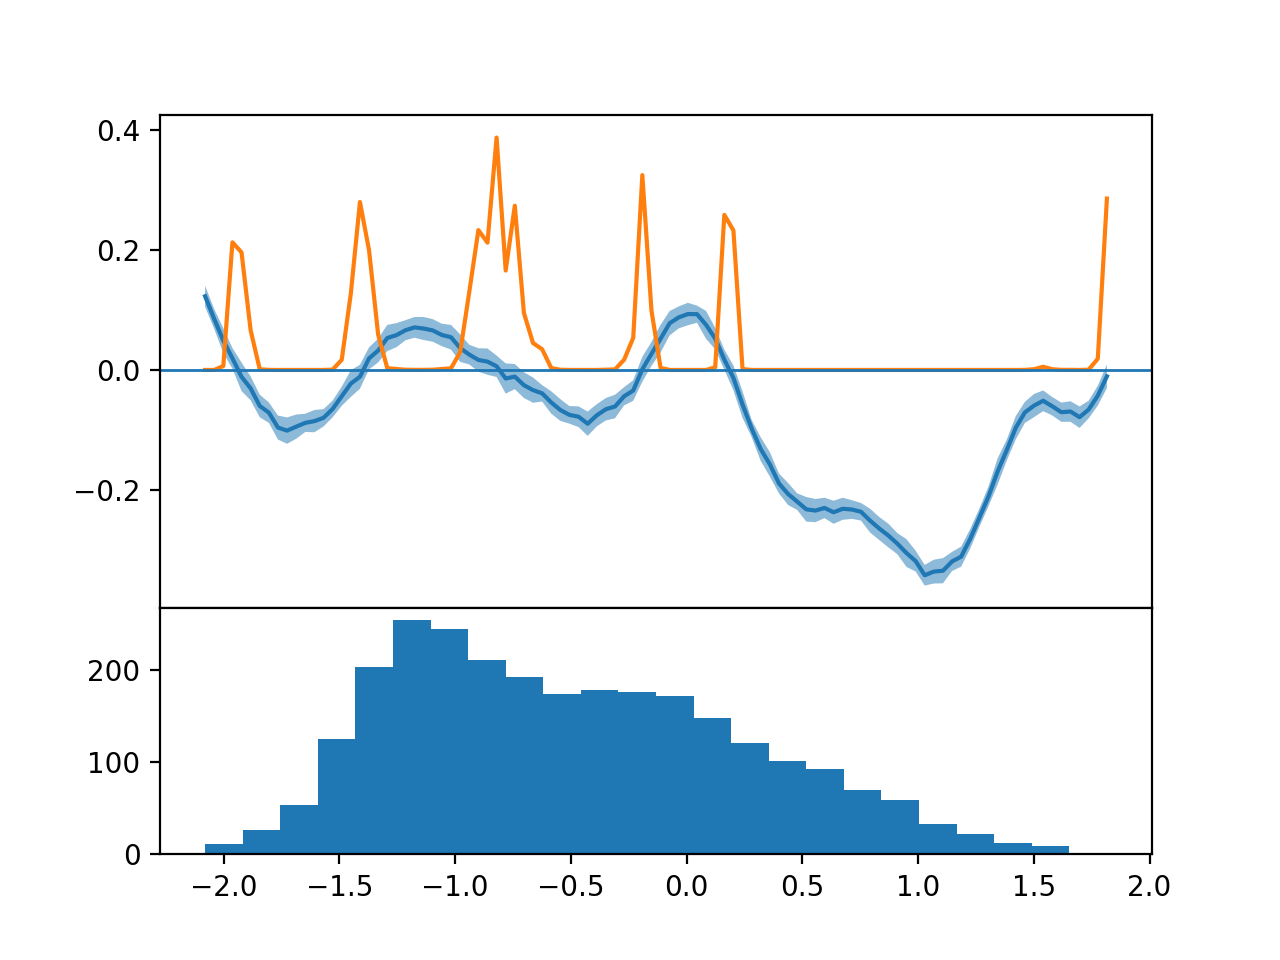

In [66]:
k = 0
mu = cf[:, k, 0]
std = cf[:, k, 1]

fig, ax = plt.subplots(nrows=2, sharex=True, gridspec_kw={"height_ratios": [1, 0.5]})
fig.subplots_adjust(hspace=0)
ax[0].plot(p, mu)
ax[0].fill_between(p, mu - std, mu + std, alpha=0.5)

ax[0].plot(p, ps[:, k])
ax[0].axhline(0, lw=1)

# ax[0].plot(zeval, np.median(out[..., 1], axis=1))

ax[1].hist(z, bins="auto")


plt.show()

In [68]:
spearmanr(dxz_summ[:, k][m], dyz_summ[m])

SpearmanrResult(correlation=-0.05736697970271058, pvalue=0.09386055980256486)

<IPython.core.display.Javascript object>


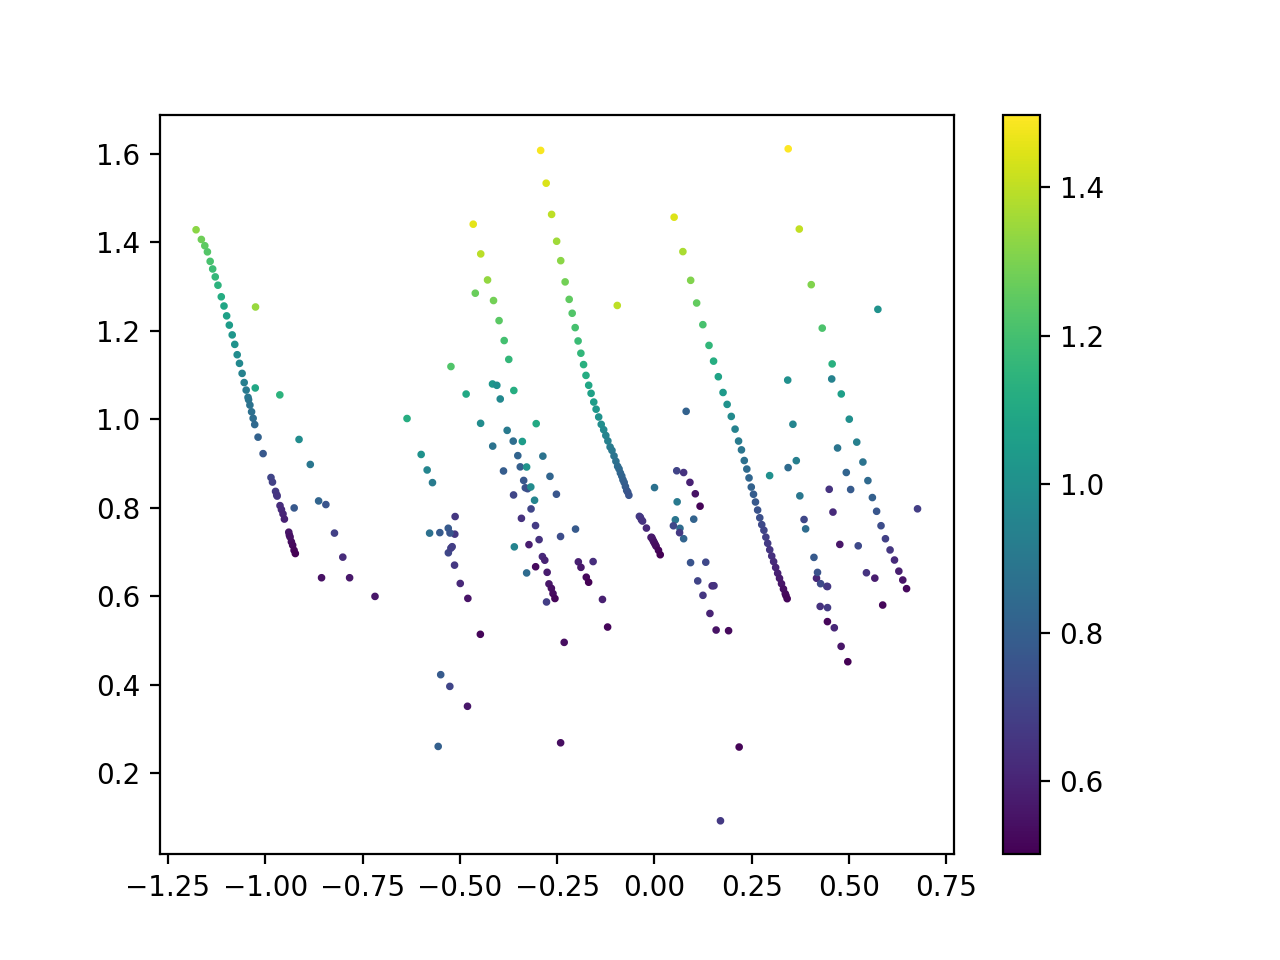

In [69]:


plt.figure()

m = (z > 0.5) & (z < 1.5)

plt.scatter(dxz_summ[:, k][m], dyz_summ[m], s=3, c=z[m])
plt.colorbar()

# plt.scatter(z, x, s=1)
# plt.scatter(z, y, s=1)

plt.show()

In [ ]:
features

In [ ]:
lgpc